<a href="https://colab.research.google.com/github/nkhan054002/QuantProjects/blob/main/quant2_portfolio_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np 
import pandas as pd

     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=9080271bb3c2763b90b96f91112a7d960545ae76788975509e9b40def6e18c05
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Contrary to MPT, I will be making a portfolio of growth companies, which will include small cap, high P/E, low or no dividends sort of companies

"Sanjay Basu, demonstrated that low price-to-earnings ratio (P/E) stocks outperformed high P/E stocks. And in the early 1980s, another researcher, Rolf Banz, demonstrated that small-capitalization stocks outperformed large-cap stocks."

**NOTE : If I can only have 2 - 3 companies, to show great growth, and the other 7 - 8 companies can also not make much progress I can be promised to get a CAGR of 15% or above**

I am basing my above assumption from Venture Capital portfolios based especially on the ideation stage, where out of a portfolio of 10 companies even if 1 succeeds to become a successful company and some even fail, result in a loss, the net profit can come out to be about 18 - 20% CAGR

Since the companies are publicly listed, this can imply that the companies already are somewhat successful and probably have a scalable business model


As is evident from the NIFTY50 chart and the CNXSMALLCAP, the overall small cap and the market as a whole are on a nice, strong uptrend.
Hence, I will be choosing a portfolio with 10-15% belonging to stocks that have a negative value of beta

I will be using NIFTY SMALL CAP as mybenchmark to calculate beta

My portfolio will be a value company based strategy, and i will also be keeping gold companies for a negative beta, hedging...

the following were used for screening
M.Cap. - 1000Cr - 5000Cr - small cap
Close Price - 100-1000 - to avoid penny stocks
PE Ratio - high - 45 - 1200 
DPS - 0 - 0.5 - low dividends for value companies
beta - high - 1 - 4.44
1 yr return - 143 - 31600% - a multibagger over the past year or so
similarly 6 m return - 71 - 19712


1.ZENTEC
2.TEJASNET
3.OLECTRA
4.HINDOILEXP
5.BLS


In [ ]:
stocks = ['zentec','tejasnet','olectra','hindoilexp','bls']
p1 = yf.download('ZENTEC.NS','2017-06-30','2019-03-31',interval = '5d')['Adj Close']
p2 = yf.download('TEJASNET.NS','2017-06-30','2019-03-31',interval = '5d')['Adj Close']
p3 = yf.download('OLECTRA.NS','2017-06-30','2019-03-31',interval = '5d')['Adj Close']
p4 = yf.download('HINDOILEXP.NS','2017-06-30','2019-03-31',interval = '5d')['Adj Close']
p5 = yf.download('BLS.NS','2017-06-30','2019-03-31',interval = '5d')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
r1 = 100*p1.pct_change()
r2 = 100*p2.pct_change()
r4 = 100*p4.pct_change()
r3 = 100*p3.pct_change()
r5 = 100*p5.pct_change()

In [ ]:
p0 = yf.download('^NSEI','2017-06-30','2019-03-31',interval = '5d')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
def beta (d1,d2):
  d12 = pd.merge(d1,d2,right_index = True,left_index = True)
  covar = d12.cov()
  covr = np.array(covar)
  co = covr[0][1] 
  var_d2 = d2.var()
  b = co/var_d2
  return b

In [ ]:
r0 = 100*p0.pct_change()

In [ ]:
b1 = beta(r1,r0)

In [ ]:
b1

2.419375776688568

In [ ]:
r1

Date
2017-06-30          NaN
2017-07-05     0.099998
2017-07-10    20.179835
2017-07-20    -5.735664
2017-07-25     4.938272
                ...    
2019-02-25     5.453211
2019-03-07     8.595393
2019-03-12    -2.831406
2019-03-22    -0.066235
2019-03-27    -7.422125
Name: Adj Close, Length: 89, dtype: float64

In [ ]:
r2

Date
2017-06-30          NaN
2017-07-05    -0.330565
2017-07-10    21.824196
2017-07-20    -4.505849
2017-07-25    -4.290796
                ...    
2019-02-25     3.913889
2019-03-07    13.559317
2019-03-12     0.082925
2019-03-22    -8.257384
2019-03-27     2.408184
Name: Adj Close, Length: 87, dtype: float64

In [ ]:
b2 = beta(r2,r0)
b3 = beta(r3,r0)
b4 = beta(r4,r0)
b5 = beta(r5,r0)

In [ ]:
b2

1.0825886476162376

In [ ]:
print(b3,b4,b5)

2.136906930819947 1.3544838973961086 1.7534937652731877


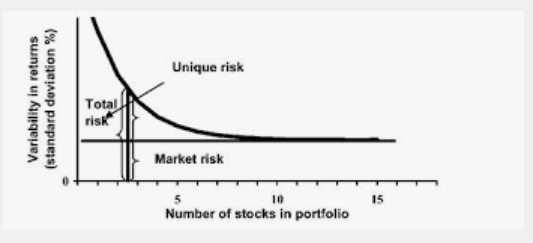

notice in the above graph how the volatility decreases as the number of assets increase, as we can see as infinite number of stocks results in a constant risk which can be said to be the minimum market risk, i.e. the systematic risk


i will also be adding a negative beta stock for hedging purposes - GOLDBEES

In [ ]:
p6 = yf.download('GOLDBEES.NS','2017-06-30','2019-03-31',interval = '5d')['Adj Close']
r6 = 100*p6.pct_change()
b6 = beta(r6,r0)
print(p6)
b6

[*********************100%***********************]  1 of 1 completed
Date
2017-06-30    25.768999
2017-07-05    25.414499
2017-07-10    25.099001
2017-07-20    25.472500
2017-07-25    25.676500
                ...    
2019-02-25    29.569000
2019-03-07    28.324499
2019-03-12    28.358500
2019-03-22    28.391001
2019-03-27    28.382000
Name: Adj Close, Length: 87, dtype: float64


-0.051156747126724834

In [ ]:
stx = ['ZENTEC', 'TEJASNET', 'OLECTRA', 'HINDOILEXP', 'BLS','GOLDBEES']
df = pd.merge(p1,p2,right_index = True, left_index = True)
df = pd.merge(df,p3,right_index = True, left_index = True)
df = pd.merge(df,p4,right_index = True, left_index = True)
df = pd.merge(df,p5,right_index = True, left_index = True)
df = pd.merge(df,p6,right_index = True, left_index = True)
df
df.set_axis(stx,axis = 1)
#df.iloc[[1]]

,ZENTEC,TEJASNET,OLECTRA,HINDOILEXP,BLS,GOLDBEES
Date,,,,,,
2017-06-30,49.206520,298.126923,57.150002,71.349998,186.117233,25.768999
2017-07-05,49.255726,297.141418,64.050003,71.599998,206.567047,25.414499
2017-07-10,59.195450,361.990143,64.150002,72.599998,192.805557,25.099001
2017-07-20,55.800198,345.679413,72.099998,75.000000,188.859955,25.472500
2017-07-25,58.555763,330.847015,72.300003,76.849998,187.945709,25.676500
...,...,...,...,...,...,...
2019-02-25,70.703461,156.997101,210.649994,119.000000,102.018669,29.569000
2019-03-07,76.780701,178.284836,247.350006,126.050003,107.914581,28.324499
2019-03-12,74.606728,178.432678,254.050003,127.099998,118.739868,28.358500


In [ ]:
df1 = pd.merge(r1,r2,right_index = True, left_index = True)
df1 = pd.merge(df1,r3,right_index = True, left_index = True)
df1 = pd.merge(df1,r4,right_index = True, left_index = True)
df1 = pd.merge(df1,r5,right_index = True, left_index = True)
df1 = pd.merge(df1,r6,right_index = True, left_index = True)
df1
#print(df1)
df1 = df1[1:]
df1

,Adj Close_x,Adj Close_y,Adj Close_x,Adj Close_y,Adj Close_x,Adj Close_y
Date,,,,,,
2017-07-05,0.099998,-0.330565,12.073493,0.350385,10.987598,-1.375683
2017-07-10,20.179835,21.824196,0.156126,1.396648,-6.661997,-1.241411
2017-07-20,-5.735664,-4.505849,12.392824,3.305787,-2.046415,1.488103
2017-07-25,4.938272,-4.290796,0.277399,2.466665,-0.484087,0.800866
2017-08-04,-5.882355,4.155483,10.096812,-1.951854,-0.896055,0.519927
...,...,...,...,...,...,...
2019-02-25,5.453211,3.913889,3.057730,1.319713,11.222336,-1.174778
2019-03-07,8.595393,13.559317,17.422271,5.924372,5.779248,-4.208803
2019-03-12,-2.831406,0.082925,2.708711,0.832999,10.031348,0.120039


In [ ]:
#number of iterations : 1000
ni = 1000
ns = len(stx)
#set wgts
wgts = np.zeros((ni,ns))
ret = np.zeros(ni)
v = np.zeros(ni)
s = np.zeros(ni)
rm = np.array(df1)
print(rm)
rm1 = np.log(1+0.01*rm)
rm1 = pd.DataFrame(rm1)
print(rm1)
rm2 = rm1.mean()

[[ 9.99984960e-02 -3.30565298e-01  1.20734932e+01  3.50385431e-01
   1.09875982e+01 -1.37568330e+00]
 [ 2.01798345e+01  2.18241956e+01  1.56125635e-01  1.39664807e+00
  -6.66199670e+00 -1.24141085e+00]
 [-5.73566421e+00 -4.50584921e+00  1.23928243e+01  3.30578730e+00
  -2.04641530e+00  1.48810272e+00]
 [ 4.93827220e+00 -4.29079572e+00  2.77398865e-01  2.46666463e+00
  -4.84086532e-01  8.00865538e-01]
 [-5.88235524e+00  4.15548286e+00  1.00968121e+01 -1.95185430e+00
  -8.96055194e-01  5.19927342e-01]
 [-4.01785881e+00 -7.03560199e+00  1.68341731e+01 -2.12342204e+00
  -4.95996466e+00 -1.49166342e-01]
 [-7.44185647e+00  1.69206059e-01  2.12365591e+01 -2.77966515e+00
  -2.33758277e+00  1.01469187e+00]
 [ 1.30653629e+00  1.27456700e+00  2.09756043e+01  3.13807545e+00
   2.07347553e+01 -9.98769854e-02]
 [-1.19048123e+00  4.09407681e-01  1.02272821e+01  8.65449870e+00
   2.53576853e-01  3.15491760e+00]
 [ 8.63453231e+00  1.93294622e+00  3.89757156e+01  1.19477270e+01
   4.27684650e+00  1.8208

In [ ]:
sn = 0
nm = 0
for i in range (1000) :
  w = np.random.random(ns)
  w = w/np.sum(w)
  wgts[i] = w
  ret[i] = np.sum(rm2*w)*252
  v[i] = np.sqrt(
      np.dot(w.T,(np.dot(rm1.cov()*252,w)))
  )
  s[i] = ret[i]/v[i]
  if s[i] > sn:
    sn = s[i]
    nm = i

final = [ret,v,s,wgts]

in a video it was said that log returns would be better

log_returns = np.log(1+price.pct_change())


In [ ]:
ret[nm]

2.239895962449337

In [ ]:
wgts[nm]
#np.sum(wgts[i])


array([0.06731323, 0.03024777, 0.38219034, 0.28149264, 0.00340414,
       0.23535188])

In [ ]:
s[nm]

2.581393518275823

In [ ]:
v[nm]

0.8677080602361701

In [ ]:
df

,Adj Close_x,Adj Close_y,Adj Close_x,Adj Close_y,Adj Close_x,Adj Close_y
Date,,,,,,
2017-06-30,49.206520,298.126923,57.150002,71.349998,186.117233,25.768999
2017-07-05,49.255726,297.141418,64.050003,71.599998,206.567047,25.414499
2017-07-10,59.195450,361.990143,64.150002,72.599998,192.805557,25.099001
2017-07-20,55.800198,345.679413,72.099998,75.000000,188.859955,25.472500
2017-07-25,58.555763,330.847015,72.300003,76.849998,187.945709,25.676500
...,...,...,...,...,...,...
2019-02-25,70.703461,156.997101,210.649994,119.000000,102.018669,29.569000
2019-03-07,76.780701,178.284836,247.350006,126.050003,107.914581,28.324499
2019-03-12,74.606728,178.432678,254.050003,127.099998,118.739868,28.358500


In [ ]:
np.log(10)
#base of np.log is e
x = ret[nm]
#rtrn = ret[nm]/np.log(10)
#retnrn = np.exp(ret[nm])
#retnrn-1

In [ ]:
df = df.set_axis(stx,axis = 1)

In [ ]:
df

,ZENTEC,TEJASNET,OLECTRA,HINDOILEXP,BLS,GOLDBEES
Date,,,,,,
2017-06-30,49.206520,298.126923,57.150002,71.349998,186.117233,25.768999
2017-07-05,49.255726,297.141418,64.050003,71.599998,206.567047,25.414499
2017-07-10,59.195450,361.990143,64.150002,72.599998,192.805557,25.099001
2017-07-20,55.800198,345.679413,72.099998,75.000000,188.859955,25.472500
2017-07-25,58.555763,330.847015,72.300003,76.849998,187.945709,25.676500
...,...,...,...,...,...,...
2019-02-25,70.703461,156.997101,210.649994,119.000000,102.018669,29.569000
2019-03-07,76.780701,178.284836,247.350006,126.050003,107.914581,28.324499
2019-03-12,74.606728,178.432678,254.050003,127.099998,118.739868,28.358500


df

In [ ]:
rext = df.loc[['2017-06-30']]
# = df.loc([['2019-03-27']])

In [ ]:
rexty = df.loc[['2019-03-27']]
rexty

,ZENTEC,TEJASNET,OLECTRA,HINDOILEXP,BLS,GOLDBEES
Date,,,,,,
2019-03-27,69.023575,167.640976,252.649994,130.550003,109.219414,28.382


In [ ]:
rext = np.array(rext)
rext
rext = rext.T
rext

array([[ 49.20652008],
       [298.12692261],
       [ 57.15000153],
       [ 71.34999847],
       [186.11723328],
       [ 25.7689991 ]])

In [ ]:
rext = rext.T
rf = np.dot(rext,wgts[nm])

In [ ]:

rf

array([60.95495446])

In [ ]:
rf2 = np.dot(rexty,wgts[nm])
rf2

array([150.07777304])

In [ ]:
#to test the accurcy of this model from 2019-03-27 till 2020-03-27

In [ ]:
dfi = yf.download('^NSEI','2017-06-30','2019-03-27')

[*********************100%***********************]  1 of 1 completed


In [ ]:
dfi = dfi['Adj Close']

In [ ]:
xyzc = dfi.pct_change().mean()

In [ ]:
xyzc = 252*xyzc

In [ ]:
#assuming risk free rate to be 0

In [ ]:
bm = np.zeros(6)
bm[0] = b1
bm[1] = b2
bm[2] = b3
bm[3] = b4
bm[4] = b5
bm[5] = b6

In [ ]:
b_net = np.dot(bm,wgts[nm])
b_net

1.3875136202459835

In [ ]:
expected_return = b_net*xyzc
expected_return*100
#if i calculate expected rtur

16.29937594821382

In [ ]:
stocks = ['zentec','tejasnet','olectra','hindoilexp','bls','goldbees']
p11 = yf.download('ZENTEC.NS','2019-03-31','2021-03-31',interval = '5d')['Adj Close']
p21 = yf.download('TEJASNET.NS','2019-03-31','2021-03-31',interval = '5d')['Adj Close']
p31 = yf.download('OLECTRA.NS','2019-03-31','2021-03-31',interval = '5d')['Adj Close']
p41 = yf.download('HINDOILEXP.NS','2019-03-31','2021-03-31',interval = '5d')['Adj Close']
p51 = yf.download('BLS.NS','2019-03-31','2021-03-31',interval = '5d')['Adj Close']
p61 = yf.download('GOLDBEES.NS','2019-03-31','2021-03-31',interval = '5d')['Adj Close']
r11 = 100*p1.pct_change()
r21 = 100*p2.pct_change()
r41 = 100*p4.pct_change()
r31 = 100*p3.pct_change()
r51 = 100*p5.pct_change()
r61 = 100*p6.pct_change()

stx = ['ZENTEC', 'TEJASNET', 'OLECTRA', 'HINDOILEXP', 'BLS','GOLDBEES']
df11 = pd.merge(p11,p21,right_index = True, left_index = True)
df11 = pd.merge(df11,p31,right_index = True, left_index = True)
df11 = pd.merge(df11,p41,right_index = True, left_index = True)
df11 = pd.merge(df11,p51,right_index = True, left_index = True)
df11 = pd.merge(df11,p61,right_index = True, left_index = True)
df11
df11.set_axis(stx,axis = 1)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ZENTEC,TEJASNET,OLECTRA,HINDOILEXP,BLS,GOLDBEES
Date,,,,,,
2019-04-05,74.310272,167.493134,248.000000,126.000000,135.702682,28.035000
2019-04-10,73.717377,180.748703,235.449997,127.650002,126.665520,28.278999
2019-04-15,76.681877,180.305191,234.699997,126.400002,122.557709,28.019501
2019-04-25,75.051399,183.458939,221.600006,128.050003,127.342110,28.194500
2019-04-30,74.310272,187.253281,209.899994,124.099998,119.561432,28.152500
...,...,...,...,...,...,...
2021-03-05,84.548866,191.899994,186.750000,101.550003,100.758759,38.669998
2021-03-10,88.094620,190.199997,216.100006,107.949997,116.894150,38.950001
2021-03-15,86.796181,185.800003,215.500000,106.400002,108.601662,39.060001


In [ ]:

dfpct = np.log(1+df11.pct_change())

In [ ]:
dfpct

,Adj Close_x,Adj Close_y,Adj Close_x,Adj Close_y,Adj Close_x,Adj Close_y
Date,,,,,,
2019-04-05,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-10,-0.008011,0.076165,-0.051930,0.013010,-0.068916,0.008666
2019-04-15,0.039427,-0.002457,-0.003190,-0.009841,-0.032968,-0.009219
2019-04-25,-0.021492,0.017340,-0.057434,0.012969,0.038295,0.006226
2019-04-30,-0.009924,0.020471,-0.054243,-0.031333,-0.063047,-0.001491
...,...,...,...,...,...,...
2021-03-05,0.004737,-0.043341,0.048830,0.066148,-0.000991,-0.050427
2021-03-10,0.041082,-0.008898,0.145970,0.061117,0.148540,0.007215
2021-03-15,-0.014849,-0.023405,-0.002780,-0.014463,-0.073582,0.002820


In [ ]:
dfpct.mean()

Adj Close_x    0.000528
Adj Close_y   -0.000595
Adj Close_x   -0.001502
Adj Close_y   -0.002445
Adj Close_x   -0.003675
Adj Close_y    0.003205
dtype: float64

In [ ]:
ret_new = dfpct.mean()*252
ret_new = np.array(ret_new)
ret_new

array([ 0.13304915, -0.15003598, -0.3785634 , -0.61623781, -0.92604743,
        0.80764147])

In [ ]:
ret__net_new = np.dot(wgts[nm],ret_new)
ret__net_new
#expected return cagr over the next 2 yrs, this is very different from the previous years mainly due to covid

-0.12680442345862858

In [ ]:
#think of more parameters to check accuracy


In [ ]:
df1

,Adj Close_x,Adj Close_y,Adj Close_x,Adj Close_y,Adj Close_x,Adj Close_y
Date,,,,,,
2017-07-05,0.099998,-0.330565,12.073493,0.350385,10.987598,-1.375683
2017-07-10,20.179835,21.824196,0.156126,1.396648,-6.661997,-1.241411
2017-07-20,-5.735664,-4.505849,12.392824,3.305787,-2.046415,1.488103
2017-07-25,4.938272,-4.290796,0.277399,2.466665,-0.484087,0.800866
2017-08-04,-5.882355,4.155483,10.096812,-1.951854,-0.896055,0.519927
...,...,...,...,...,...,...
2019-02-25,5.453211,3.913889,3.057730,1.319713,11.222336,-1.174778
2019-03-07,8.595393,13.559317,17.422271,5.924372,5.779248,-4.208803
2019-03-12,-2.831406,0.082925,2.708711,0.832999,10.031348,0.120039


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df1 = df1.set_axis(stx,axis = 1)

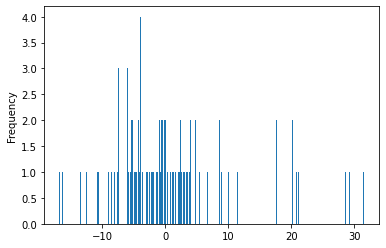

In [ ]:
df1['ZENTEC'].plot.hist(bins = 300)


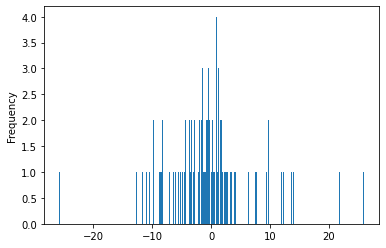

In [ ]:
df1['TEJASNET'].plot.hist(bins = 300)


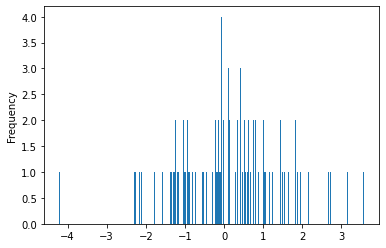

In [ ]:
df1['GOLDBEES'].plot.hist(bins = 300)


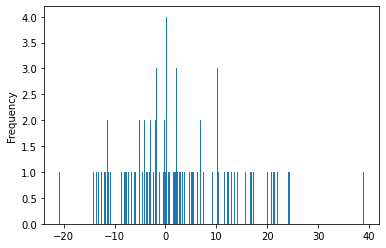

In [ ]:
df1['OLECTRA'].plot.hist(bins = 300)


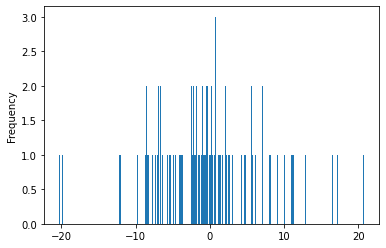

In [ ]:
df1['BLS'].plot.hist(bins = 300)

In [ ]:
#TO DISCUSS PORTFOLIO OPTIMIZATION TECCHNIQUES - 


SORTINO OPTIMIZATION, MAXIMISING TREYNOR RATIO OPTIMISATION, WALK FORWARD OPTIMISATION
